In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('../data/movies.csv')
data

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

### Data collection and Data Preprocesing

<Axes: >

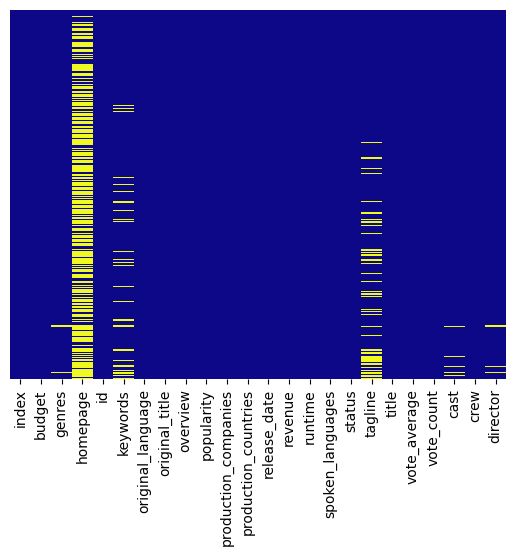

In [3]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='plasma', yticklabels=False)

In [4]:
# Feature Selection     
selected_features = ['genres', 'director', 'cast', 'keywords','budget','revenue','runtime','tagline']

In [5]:
# get the null values
for col in selected_features:
    print(col, data[col].isnull().sum())
    data[col] = data[col].fillna('') # fill the null values with empty string


genres 28
director 30
cast 43
keywords 412
budget 0
revenue 0
runtime 2
tagline 844


In [6]:
# combine all the features
movie_cols = data['genres'] + ' ' + data['director'] + ' ' + data['cast'] + ' ' + data['keywords'] + ' ' + data['tagline']

In [7]:
# converting txt data to features using TD-IDF vectorizer
vectorizer = TfidfVectorizer()
movie_features = vectorizer.fit_transform(movie_cols)
print(movie_features)

  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [8]:
# find the similarity confidence value between the movies
similarity_confidence = cosine_similarity(movie_features)
print(similarity_confidence)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [9]:
similarity_confidence_df = pd.DataFrame(similarity_confidence)
similarity_confidence_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.072195,0.037733,0.012520,0.107026,0.077869,0.008237,0.036135,0.029609,0.026287,...,0.000000,0.000000,0.004527,0.017241,0.000000,0.031482,0.011026,0.000000,0.000000,0.0
1,0.072195,1.000000,0.032815,0.020742,0.033055,0.098948,0.014379,0.019782,0.040562,0.029948,...,0.021163,0.000000,0.011854,0.000000,0.000000,0.003866,0.022912,0.035755,0.000000,0.0
2,0.037733,0.032815,1.000000,0.051795,0.057726,0.054237,0.008428,0.072583,0.034843,0.040266,...,0.043463,0.000000,0.000000,0.000000,0.000000,0.011012,0.000000,0.000000,0.053897,0.0
3,0.012520,0.020742,0.051795,1.000000,0.006717,0.045966,0.000000,0.006963,0.032106,0.099596,...,0.033537,0.008054,0.029807,0.033571,0.013002,0.023704,0.004688,0.003630,0.000000,0.0
4,0.107026,0.033055,0.057726,0.006717,1.000000,0.129897,0.008021,0.060340,0.008185,0.038323,...,0.000000,0.026956,0.000000,0.042136,0.000000,0.004314,0.000000,0.000000,0.023479,0.0


## USER API

In [10]:
# create a list of all the movie names
movies = data['title'].tolist()

In [11]:
# get the movie name from the user
movie_name = input("Enter the movie name: ")

# find the best match for the movie name
best_matches = difflib.get_close_matches(movie_name, movies)

if movie_name not in best_matches:
    print('Movie not found. Did you mean?')
    for i in best_matches:
        index = best_matches.index(i)+1
        print( "                 " + str(index)+"."+i)
        
    ans = input("Enter Y for Yes and N for No: " )

    if ans == 'Y':
        print("Enter the number of your movie from above list")
        index = int(input("Enter the number: "))
        movie_name = best_matches[index-1]
    elif ans == 'N':
        best_match = best_matches[0]
        print("Using "+best_match+" instead.")
        movie_name = best_match
    else:
        print("Invalid Input")
        exit()


print("Movie selected: ", movie_name)


Movie not found. Did you mean?
                 1.Iron Man
                 2.Iron Man 3
                 3.Iron Man 2
Enter the number of your movie from above list
Movie selected:  Iron Man


### Get the recommendations

In [12]:
# find the index of the movie from data
movie_index = data[data.title == movie_name].index.values[0]
print("Movie index: ", movie_index)

Movie index:  68


In [13]:
# now get similar movies
similar_movie_indices = list(enumerate(similarity_confidence[movie_index]))
sorted_similar_movie_indices = sorted(similar_movie_indices, key=lambda x:x[1], reverse=True)
sorted_similar_movie_indices

[(68, 1.0000000000000002),
 (79, 0.4089043399800596),
 (31, 0.3146705244947751),
 (7, 0.23944423963486414),
 (16, 0.227044037822968),
 (26, 0.21566241096831154),
 (85, 0.20615862984665334),
 (182, 0.19573956139611606),
 (511, 0.16702973947860686),
 (3623, 0.1609246088135586),
 (64, 0.15299924139445142),
 (203, 0.14818667948665118),
 (174, 0.1471993120942043),
 (4401, 0.14505971470107848),
 (101, 0.14401677581826294),
 (46, 0.14216268867232237),
 (169, 0.1380947013224906),
 (1740, 0.13624382641690763),
 (94, 0.1361681957902901),
 (788, 0.1330589507422922),
 (126, 0.13263982780511063),
 (131, 0.13137698586006535),
 (33, 0.13089810941050173),
 (2487, 0.12309731939910507),
 (783, 0.12162995562040377),
 (138, 0.11846458075866884),
 (2442, 0.11725512335483321),
 (661, 0.11719294096248463),
 (607, 0.11387063493435637),
 (38, 0.1126182690487113),
 (2651, 0.1121878787373205),
 (353, 0.1116846512704428),
 (122, 0.10850296033661253),
 (1553, 0.1079782217151326),
 (1451, 0.107849394974707),
 (242,

In [18]:
# print the names of top ten similar movies and their keywords
print("Here are the suggested movies: \n")

for i in sorted_similar_movie_indices[1:11]:
    print(movies[i[0]]+"\n"+" Keywords: "+data['keywords'][i[0]]+"\n")

Here are the suggested movies: 
Iron Man 2
 Keywords: malibu marvel comic superhero based on comic book revenge

Iron Man 3
 Keywords: terrorist war on terror tennessee malibu marvel comic

Avengers: Age of Ultron
 Keywords: marvel comic sequel superhero based on comic book vision

The Avengers
 Keywords: new york shield marvel comic superhero based on comic book

Captain America: Civil War
 Keywords: civil war war marvel comic sequel superhero

Captain America: The Winter Soldier
 Keywords: washington d.c. future shield marvel comic superhero

Ant-Man
 Keywords: marvel comic superhero based on comic book aftercreditsstinger duringcreditsstinger

X-Men
 Keywords: mutant marvel comic superhero based on comic book superhuman

Made
 Keywords: 

X-Men: Apocalypse
 Keywords: mutant supernatural powers marvel comic superhero based on comic book



Now combine all relevant code to output top ten recommendations for a user, given a movie title

In [20]:
# get the movie name from the user
movie_name = input("Enter the movie name: ")

# find the best match for the movie name
best_matches = difflib.get_close_matches(movie_name, movies)

if movie_name not in best_matches:
    print('Movie not found. Did you mean?')
    for i in best_matches:
        index = best_matches.index(i)+1
        print( "                 " + str(index)+"."+i)
        
    ans = input("Enter Y for Yes and N for No: " )
    print("----------------------------------------------------------------------------------------------------------------")

    if ans == 'Y':
        print("Enter the number of your movie from above list")
        index = int(input("Enter the number: "))
        movie_name = best_matches[index-1]
        print("You have selected: ", movie_name)

    elif ans == 'N':
        best_match = best_matches[0]
        print("Using "+best_match+" instead.")
        movie_name = best_match

        print("You have selected: ", movie_name)
    else:
        print("Invalid Input")
        exit()

print("----------------------------------------------------------------------------------------------------------------")

print("Movie selected: ", movie_name)
print("----------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------")
##############################################################################################################
# find the index of the movie from data
movie_index = data[data.title == movie_name].index.values[0]


# now get similar movies
similar_movie_indices = list(enumerate(similarity_confidence[movie_index]))
sorted_similar_movie_indices = sorted(similar_movie_indices, key=lambda x:x[1], reverse=True)

##############################################################################################################

# print the names of top ten similar movies and their keywords
print("Here are the suggested movies: \n")

for i in sorted_similar_movie_indices[1:11]:
    print(movies[i[0]]+"\n"+" Keywords: "+data['keywords'][i[0]]+"\n")
print("----------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------")

Movie not found. Did you mean?
                 1.Transamerica
                 2.Mi America
                 3.Captain America: Civil War
----------------------------------------------------------------------------------------------------------------
Enter the number of your movie from above list
----------------------------------------------------------------------------------------------------------------
Movie selected:  Captain America: Civil War
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Here are the suggested movies: 

Captain America: The Winter Soldier
 Keywords: washington d.c. future shield marvel comic superhero

Avengers: Age of Ultron
 Keywords: marvel comic sequel superhero based on comic book vision

The Avengers
 Keywords: new york shield marvel comic superhero based on comic book

Iron Ma